In [110]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
# download ethereum data from yfinance
eth = yf.download('ETH-USD', start='2015-08-07', end='2022-08-07')

# convert to pandas dataframe
eth = pd.DataFrame(eth)

eth.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [112]:
# drop every date that is not friday or monday
# Create a boolean mask that filters out the desired dates
mask_friday = (eth.index.weekday == 4)
mask_monday = (eth.index.weekday == 0)

# use the boolean mask to filter the dataframe and keep only friday and monday
eth_x = eth[mask_friday]
eth_y = eth[mask_monday]

print(eth_x.head())
print(eth_y.head())



                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2017-11-17  330.166992  334.963989  327.523010  332.394012  332.394012   
2017-11-24  412.501007  480.972992  402.757996  474.911011  474.911011   
2017-12-01  445.209015  472.609009  428.312012  466.540009  466.540009   
2017-12-08  434.989014  466.062012  422.367004  456.031006  456.031006   

                Volume  
Date                    
2017-11-10   885985984  
2017-11-17   621732992  
2017-11-24  2292829952  
2017-12-01  1247879936  
2017-12-08  2336379904  
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   
2017-11-20  354.093994  372.136993  353.289001  366.730011  366.730011   
2017-11-27

In [113]:
# change eth_x to percent change
eth_x = eth_x.pct_change()

# change inf to 0
eth_x = eth_x.replace([np.inf, -np.inf], 0)

# drop na
eth_x = eth_x.dropna()

# drop afjusted close
eth_x = eth_x.drop(['Adj Close'], axis=1)

In [114]:
eth_x

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-17,0.029613,0.031554,0.111974,0.110746,-0.298259
2017-11-24,0.249371,0.435895,0.229709,0.428759,2.687805
2017-12-01,0.079292,-0.017390,0.063448,-0.017626,-0.455747
2017-12-08,-0.022956,-0.013853,-0.013880,-0.022525,0.872279
2017-12-15,0.600905,0.495792,0.470430,0.500880,0.180763
...,...,...,...,...,...
2022-07-08,0.158439,0.147844,0.154287,0.153561,-0.067632
2022-07-15,-0.037093,0.010209,-0.014766,0.008689,0.067144
2022-07-22,0.323134,0.286438,0.288053,0.246751,0.086992


In [115]:
# save the eth_x index
eth_x_index = eth_x.index
print(eth_x_index)
print(len(eth_x_index))

# save the eth_x columns
eth_x_columns = eth_x.columns

# scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
eth_x = scaler.fit_transform(eth_x)

# put eth_x to pandas dataframe
eth_x = pd.DataFrame(eth_x, columns=eth_x_columns, index=eth_x_index)

eth_x

DatetimeIndex(['2017-11-17', '2017-11-24', '2017-12-01', '2017-12-08',
               '2017-12-15', '2017-12-22', '2017-12-29', '2018-01-05',
               '2018-01-12', '2018-01-19',
               ...
               '2022-06-03', '2022-06-10', '2022-06-17', '2022-06-24',
               '2022-07-01', '2022-07-08', '2022-07-15', '2022-07-22',
               '2022-07-29', '2022-08-05'],
              dtype='datetime64[ns]', name='Date', length=247, freq=None)
247


,Open,High,Low,Close,Volume
Date,,,,,
2017-11-17,0.459676,0.411352,0.644985,0.499283,0.099507
2017-11-24,0.647483,0.767292,0.754113,0.780918,1.000000
2017-12-01,0.502132,0.368268,0.600006,0.385595,0.052014
2017-12-08,0.414750,0.371381,0.528332,0.381256,0.452501
2017-12-15,0.947907,0.820020,0.977236,0.844790,0.243963
...,...,...,...,...,...
2022-07-08,0.569772,0.513723,0.684205,0.537200,0.169056
2022-07-15,0.402669,0.392563,0.527510,0.408901,0.209700
2022-07-22,0.710522,0.635726,0.808192,0.619730,0.215685


In [116]:

# drop from y all other values than open
eth_y = eth_y.drop(['High', 'Low', 'Close', 'Volume'], axis=1)

# remove datetimeindex from eth_y
eth_y = eth_y.reset_index()

# rename eth_y column to target_open
eth_y = eth_y.rename(columns={'Open': 'target_open'})

# set eth_y's index the index from eth_x
eth_y = eth_y.set_index(eth_x.index)

# join eth_x and eth_y
eth = eth_x.join(eth_y)

# drop date from eth
eth = eth.drop(['Date'], axis=1)

eth

,Open,High,Low,Close,Volume,target_open,Adj Close
Date,,,,,,,
2017-11-17,0.459676,0.411352,0.644985,0.499283,0.099507,307.024994,316.716003
2017-11-24,0.647483,0.767292,0.754113,0.780918,1.000000,354.093994,366.730011
2017-12-01,0.502132,0.368268,0.600006,0.385595,0.052014,471.531006,480.355011
2017-12-08,0.414750,0.371381,0.528332,0.381256,0.452501,466.053986,470.204010
2017-12-15,0.947907,0.820020,0.977236,0.844790,0.243963,440.358002,515.135986
...,...,...,...,...,...,...,...
2022-07-08,0.569772,0.513723,0.684205,0.537200,0.169056,1073.794312,1151.059082
2022-07-15,0.402669,0.392563,0.527510,0.408901,0.209700,1168.139038,1097.236572
2022-07-22,0.710522,0.635726,0.808192,0.619730,0.215685,1338.806030,1578.717896


In [117]:
# split into x and y, y is target_open
x = eth.drop(['target_open'], axis=1)
y = eth['target_open']

# split into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=False)

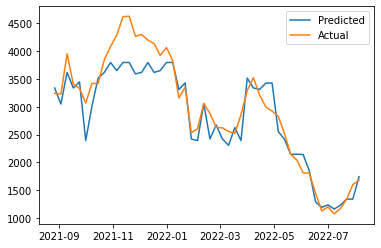

RMSE: 337.498708


In [118]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# create DMatrix
dtrain = xgb.DMatrix(x_train, label=y_train)

# create parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'eta': [0.01, 0.1, 0.3, 0.5, 0.7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'lambda': [1, 2, 4],
    'alpha': [0, 1, 2],
    'objective': ['reg:squarederror'],
    'eval_metric': ['rmse']
}

# create XGBoost model
xgb_model = xgb.XGBRegressor()

# create GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, 
                           scoring='neg_mean_squared_error', 
                           return_train_score=True)

# fit to data
grid_search.fit(x_train, y_train)

# view best parameters
print(grid_search.best_params_)

# create DMatrix for test data
dtest = xgb.DMatrix(x_test)

# predict using best parameters
y_pred = grid_search.predict(x_test)

# plot, y_test index to match y_pred
plt.plot(y_test.index, y_pred, label='Predicted')
plt.plot(y_test.index, y_test, label='Actual')
plt.legend()
plt.show()

# calculate rmse
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))
